<a href="https://colab.research.google.com/github/yenlung/Deep-Learning-Basics/blob/master/colab03RNN%E5%81%9A%E6%83%85%E6%84%8F%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

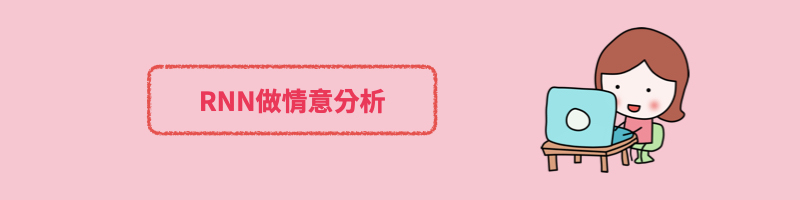

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 讀入深度學習套件

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

### 2. 讀入數據

一般自然語言處理, 我們會限制最大要使用的字數。

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
len(x_train)

25000

In [5]:
len(x_test)

25000

注意每筆評論的長度當然是不一樣的。

In [6]:
len(x_train[0])

218

In [7]:
len(x_train[1])

189

In [8]:
y_train[0]

1

In [9]:
y_train[1]

0

### 3. 資料處理

雖然我們可以做真的 seq2seq, 可是資料長度不一樣對計算上有麻煩, 因此平常還是會固定一定長度, 其餘補 0。

In [10]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

### 4. step 01: 打造一個函數學習機

In [11]:
model = Sequential()

In [12]:
model.add(Embedding(10000, 128))

In [13]:
model.add(LSTM(128))

In [14]:
model.add(Dense(1, activation='sigmoid'))

#### 組裝

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### 欣賞我們的 model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


### 5. step 02: 訓練

In [17]:
model.fit(x_train, y_train, batch_size=32, epochs=10,
         validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 27s 24ms/step - loss: 0.4205 - accuracy: 0.8037 - val_loss: 0.3676 - val_accuracy: 0.8398
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.2656 - accuracy: 0.8936 - val_loss: 0.3540 - val_accuracy: 0.8457
Epoch 3/10
782/782 [==============================] - 19s 24ms/step - loss: 0.1871 - accuracy: 0.9288 - val_loss: 0.3967 - val_accuracy: 0.8378
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1350 - accuracy: 0.9502 - val_loss: 0.5165 - val_accuracy: 0.8328
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0953 - accuracy: 0.9661 - val_loss: 0.4951 - val_accuracy: 0.8363
Epoch 6/10
782/782 [==============================] - 19s 24ms/step - loss: 0.0665 - accuracy: 0.9785 - val_loss: 0.5809 - val_accuracy: 0.8374
Epoch 7/10
782/782 [==============================] - 18s 24ms/step - loss: 0.0495 - accuracy: 0.9836 - val_loss: 0.6246 - val_accuracy:

### 換個存檔方式

這次是把 model 和訓練權重分開存, 使用上更有彈性。

In [18]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [20]:
model_json = model.to_json()
open('imdb_model_architecture.json', 'w').write(model_json)
model.save_weights('ismdb_model_weights.h5')